# Part 2 of TDQMS Coursework

In [92]:
# # # imports # # #
import numpy as np
#import numpy.linalg as npl 

import scipy.linalg as splin

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import math as math
from scipy.constants import hbar, c, electron_mass, proton_mass, h, elementary_charge

from scipy.optimize import curve_fit

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# # # data imports # # # 

PL = np.loadtxt('PL-Emission.dat',delimiter=' ')

UVVIS = np.loadtxt('UV-Vis_absorption.dat',delimiter=' ')

TA = np.loadtxt('TA-2D_data.mx3',delimiter=' ')

In [94]:
def nm_to_eV(x):
    return 1/(elementary_charge) * (h*c)/(x*10**-9)
    
nm_array = np.array([600, 690, 740, 950, 760])
nm_to_eV(nm_array)


array([2.06640331, 1.79687244, 1.67546214, 1.30509683, 1.63137103])

In [2]:
### Plot of UV-Vis and PL

# separate values from imported file
wavelengths_TA = TA[1:,0]
times = TA[0,1:]
TA_matrix = TA[1:,1:]

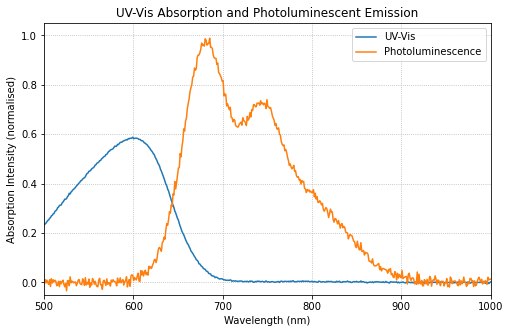

In [3]:
wavelength = PL[:,0]

PL_abs = PL[:,1]

UVVIS_abs = UVVIS[:,1]

plt.figure(figsize=[8,5])
plt.title('UV-Vis Absorption and Photoluminescent Emission')
plt.ylabel('Absorption Intensity (normalised)')
plt.xlabel('Wavelength (nm)')
plt.plot(wavelength,UVVIS_abs,label='UV-Vis')
plt.grid(linestyle=':')
plt.legend(loc='best')
#plt.twinx()
plt.plot(wavelength,PL_abs,label='Photoluminescence')
plt.xlim(500,1000)
plt.ylim(-0.05,1.05)
plt.legend(loc='best')

plt.savefig('./part2-fig/UVvis-PL.png')

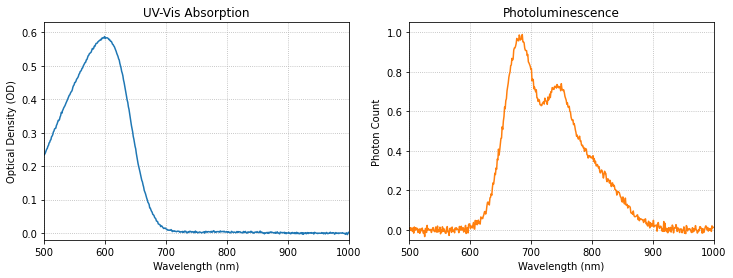

In [4]:
plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.title('UV-Vis Absorption')
plt.ylabel('Optical Density (OD)')
plt.xlabel('Wavelength (nm)')
plt.plot(wavelength,UVVIS_abs)
plt.grid(linestyle=':')
plt.xlim(500,1000)
plt.ylim(-0.02,0.63)

plt.subplot(1, 2, 2)
plt.title('Photoluminescence')
plt.ylabel('Photon Count')
plt.xlabel('Wavelength (nm)')
plt.plot(wavelength,PL_abs,color='tab:orange')
plt.xlim(500,1000)
plt.ylim(-0.05,1.05)
plt.grid(linestyle=':')

plt.savefig('./part2-fig/UVvis-PL2.png')

## Transient Absorbtion - Plotting

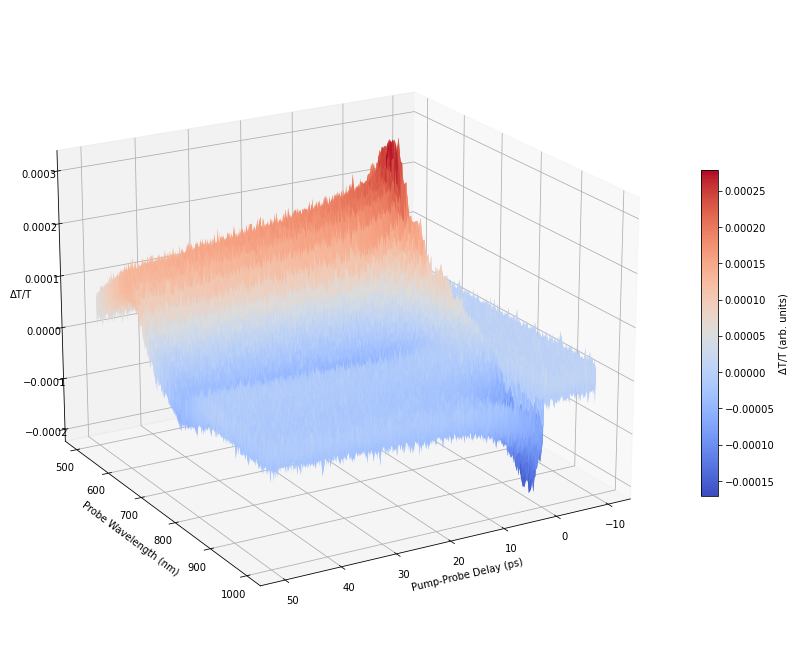

<Figure size 432x288 with 0 Axes>

In [5]:
# Assuming 'time_delays' and 'probe_wavelengths' are your 1D arrays for delays and wavelengths
# and 'dT_over_T' is your 2D array of ΔT/T values corresponding to these.
x= times
y= wavelengths_TA
x_grid, y_grid = np.meshgrid(x, y)  # Create a mesh grid for X, Y dimensions

z_values = TA_matrix  # ΔT/T values from transient absorption data

fig = plt.figure(figsize=[15, 12])
ax = fig.add_subplot(111, projection='3d')
# ax.set_zlim(-0.05, 0.01)  # Adjust the Z axis limits based on your data range
ax.view_init(20, 60)  # Adjust the viewing angle for better perspective

# Create a surface plot
p = ax.plot_surface(x_grid, y_grid, z_values, rstride=2, cstride=2, linewidth=0.1, cmap=cm.coolwarm)
cb = fig.colorbar(p, shrink=0.5)
cb.set_label('ΔT/T (arb. units)')

ax.set_ylabel('Probe Wavelength (nm)')
ax.set_xlabel('Pump-Probe Delay (ps)')
ax.set_zlabel('ΔT/T')

plt.show()

plt.savefig('./part2-fig/3D-plot.png')

### Cross Section - Spectra @ times

In [6]:
%matplotlib inline

@interact(t_index=(0,9999))

def interact_func(t_index = 1680):
    plt.figure(figsize=(8,5))
    plt.title('Snapshot of Spectrum')
    plt.plot(wavelengths_TA, TA_matrix[ : , t_index ],label='At time = {} ps'.format(round(times[t_index],2)))
    plt.plot([500,1000],[0,0],linestyle='--',color='orange')
    plt.xlim(500,1000)
    plt.grid(linestyle=':')
    plt.legend(loc='upper right')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Wavelength (nm)')
    plt.show()

interactive(children=(IntSlider(value=1680, description='t_index', max=9999), Output()), _dom_classes=('widget…

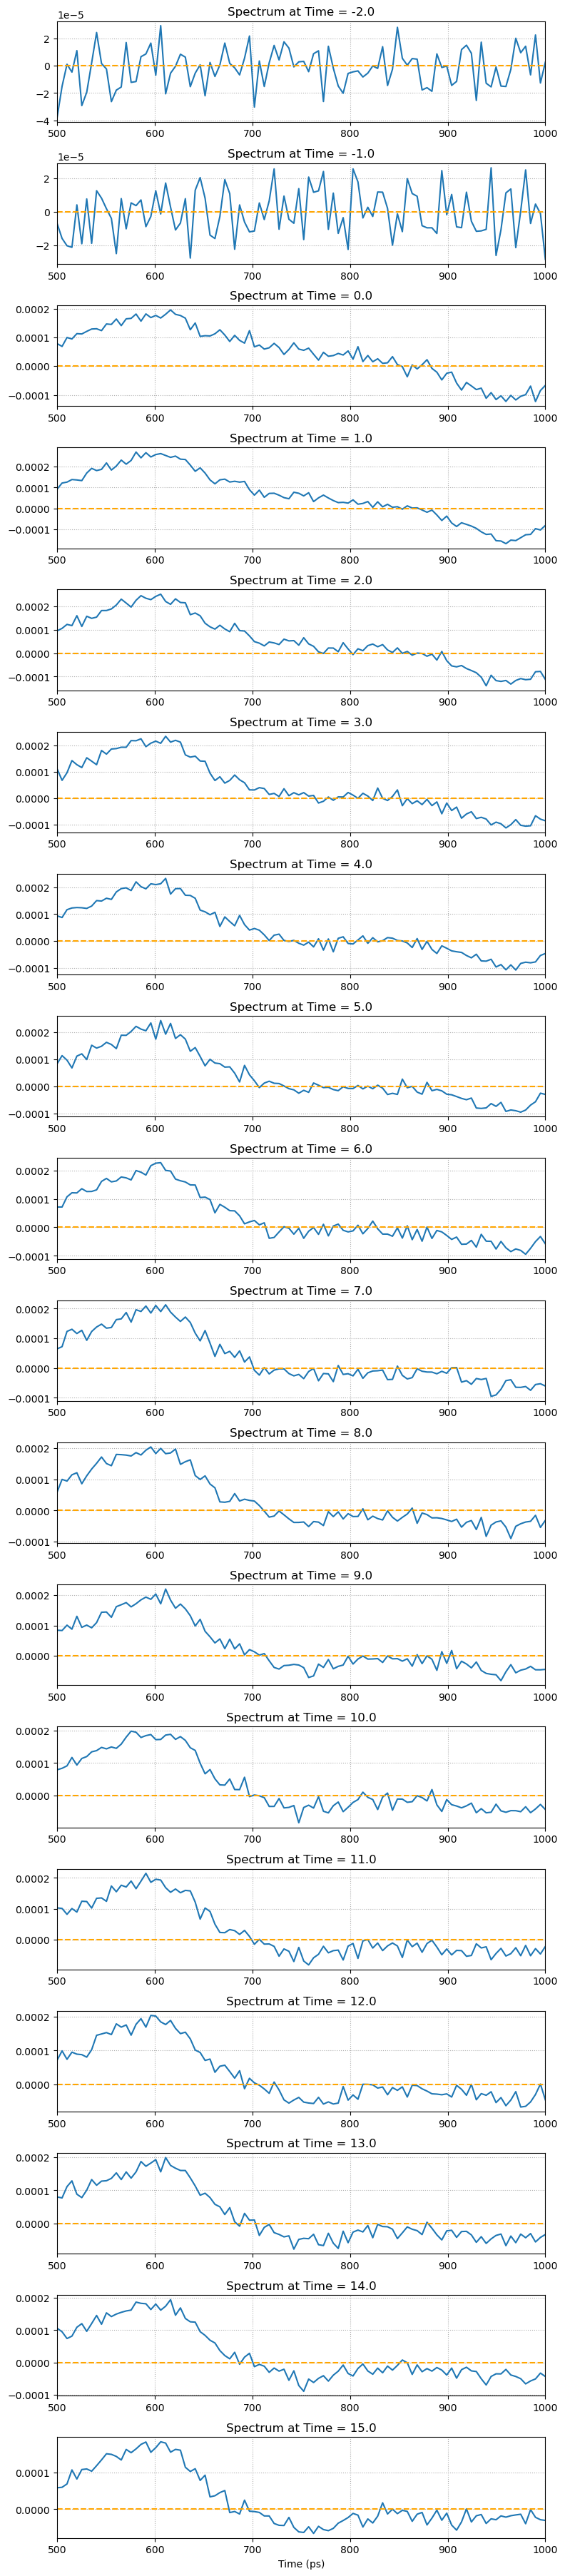

In [24]:
time_applied = 18
time_increment = 1

time_index = []
for i in range(time_applied):
    time_addition = 2 - time_increment*i
    time_index.append(np.argmin(np.abs(times + time_addition)))

plt.figure(figsize=[8,2 * time_applied])
for i,t in enumerate(time_index):
    plt.subplot(len(time_index), 1, i+1)
    plt.title('Spectrum at Time = {}'.format(round(times[t],2)))
    plt.plot(wavelengths_TA, TA_matrix[:, t])
    plt.plot([500,1000],[0,0],linestyle='--',color='orange')
    plt.xlim(wavelengths_TA[0],wavelengths_TA[-1])
    plt.grid(linestyle=':')
    

plt.tight_layout(pad=1)
plt.xlabel('Time (ps)')
plt.savefig('./part2-fig/timecuts.png')
plt.show()

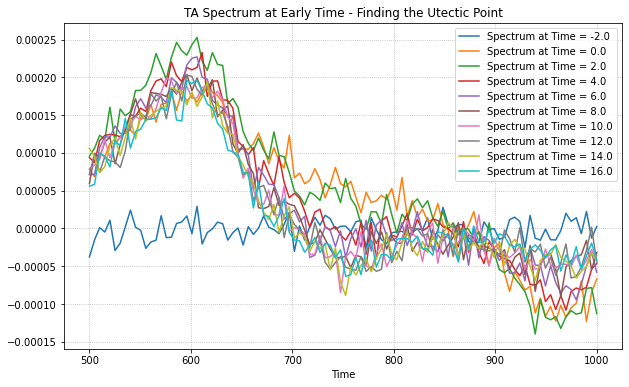

In [60]:
time_applied = 10
time_increment = 2

time_index = []
for i in range(time_applied):
    time_addition = 2 - time_increment*i
    time_index.append(np.argmin(np.abs(times + time_addition)))

plt.figure(figsize=[10,6])
plt.title('TA Spectrum at Early Time - Finding the Utectic Point')

for i,t in enumerate(time_index):
    plt.plot(wavelengths_TA, TA_matrix[:, t],label='Spectrum at Time = {}'.format(round(times[t],2)))

plt.legend(loc='best')
plt.grid(linestyle=':')
plt.xlabel('Time')
plt.show()

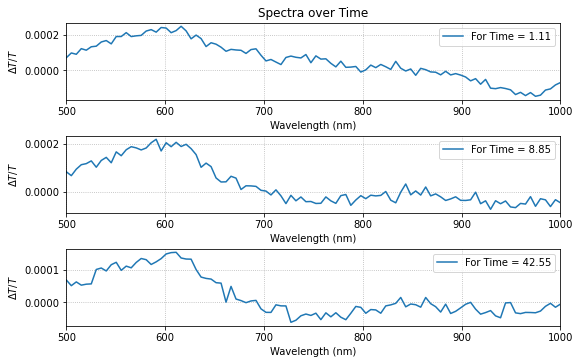

In [20]:
plt.figure(figsize=[8,5])

t_index = [1852, 3142, 8758]

for i,t in enumerate(t_index):
    plt.subplot(len(t_index), 1, i+1)
    if i+1 == 1:
        plt.title('Spectra over Time')
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Wavelength (nm)')
    plt.plot(wavelengths_TA, TA_matrix[:, t],label='For Time = {}'.format(round(times[t],2)))
    plt.xlim(500,1000)
    plt.legend(loc='best')

plt.tight_layout(pad=0.5)
plt.show()

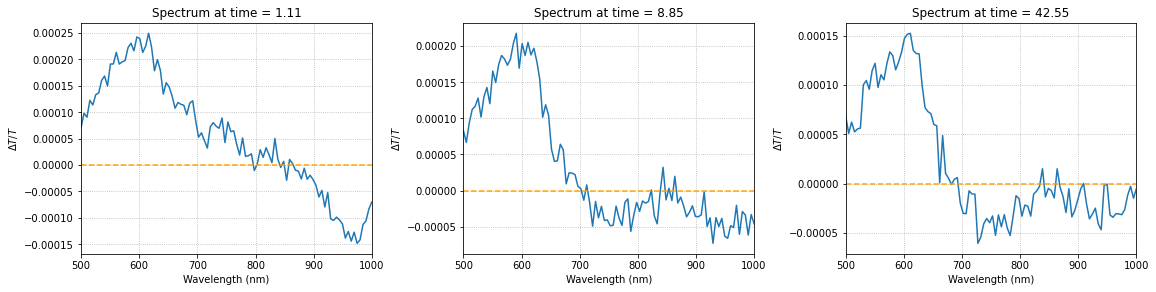

In [26]:
plt.figure(figsize=[16,4])

t_index = [1852, 3142, 8758]

for i,t in enumerate(t_index):
    plt.subplot(1, len(t_index), i+1)
    plt.title('Spectrum at time = {}'.format(round(times[t],2)))
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Wavelength (nm)')
    plt.plot(wavelengths_TA, TA_matrix[:, t])
    plt.plot([500,1000],[0,0],linestyle='--',color='orange')
    plt.xlim(500,1000)

plt.tight_layout(pad=0.5)
plt.show()

### Cross Sections - Times at Wavelength

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

@interact(w_index=(0,99))

def interact_func(w_index = 5):
    plt.figure(figsize=(8,5))
    plt.plot(times, TA_matrix[w_index, :],label='For Wavelength = {} nm'.format(round(wavelengths_TA[w_index],2)))
    plt.plot([-10,50],[0,0],linestyle='--',color='orange')
    plt.xlabel('Time (ps)')
    plt.xlim(-10,50)
    plt.ylabel('$\Delta T / T$')
    plt.legend(loc='upper right')
    plt.grid(linestyle=':')
    plt.show()

interactive(children=(IntSlider(value=5, description='w_index', max=99), Output()), _dom_classes=('widget-inte…

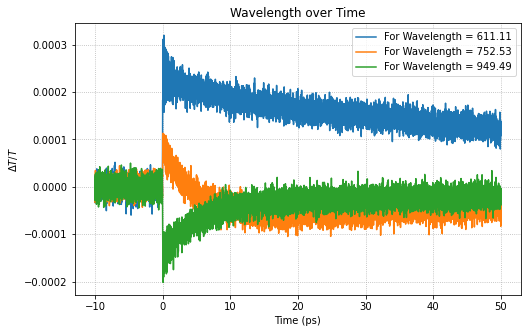

In [7]:
plt.figure(figsize=[8,5])
plt.title('Wavelength over Time')

w_index = [22, 50, 89]

for i,w in enumerate(w_index):
    plt.plot(times, TA_matrix[w, :],label='For Wavelength = {}'.format(round(wavelengths_TA[w],2)))

plt.legend(loc='best')
plt.grid(linestyle=':')
plt.ylabel('$\Delta T / T$')
plt.xlabel('Time (ps)')
plt.show()

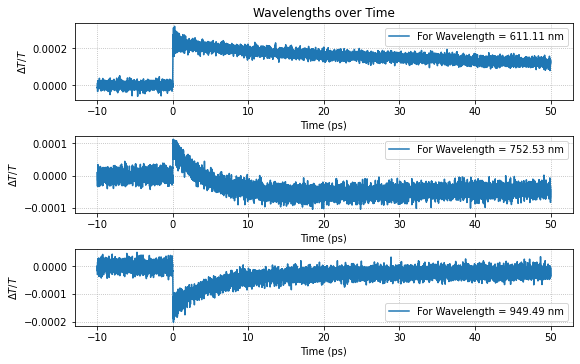

In [28]:
plt.figure(figsize=[8,5])
plt.title('Wavelength over Time')

w_index = [22, 50, 89]

for i,w in enumerate(w_index):
    plt.subplot(3, 1, i+1)
    if i+1 == 1:
        plt.title('Wavelengths over Time')
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Time (ps)')
    plt.plot(times, TA_matrix[w, :],label='For Wavelength = {}'.format(round(wavelengths_TA[w],2))+' nm')
    plt.legend(loc='best')

plt.tight_layout(pad=0.5)
plt.show()

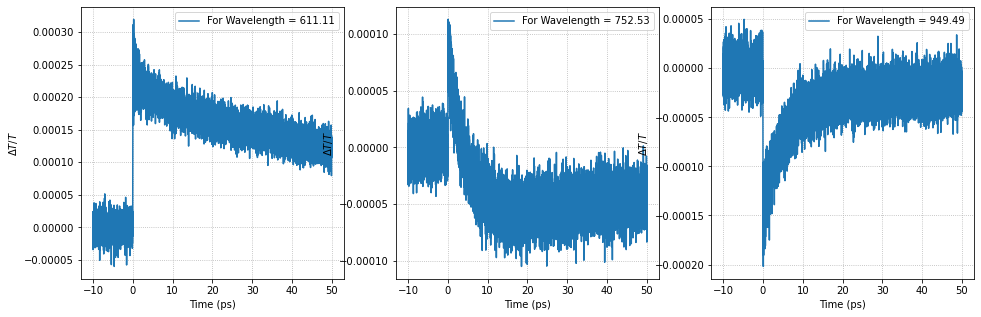

In [13]:
plt.figure(figsize=[16,5])
plt.title('Wavelength over Time')

w_index = [22, 50, 89]

for i,w in enumerate(w_index):
    plt.subplot(1, 3, i+1)
    
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Time (ps)')
    plt.plot(times, TA_matrix[w, :],label='For Wavelength = {}'.format(round(wavelengths_TA[w],2)))
    plt.legend(loc='best')

plt.show()

## Transient Absorption - Single Value Decomposition (SVD)

In [87]:
U_full, SIG_full, EPS_full = np.linalg.svd(np.transpose(TA_matrix))

# where U is a matrix of 'c' columns - the 'kinetics' of the system

# SIG is a diagonal matrix of the weightings

# EPS is a matrix of absorption rows

In [88]:
# find maximum of 'weightings', SIG
SIG_max = np.max(SIG_full)

# exclude all weightings less than 5 % of max
tol = 0.05
SIG = SIG_full[ SIG_full >= SIG_max * tol ]

In [89]:
# can see that only first two rows are of significant weighting
# as spectra are in rows (for a particular time, take the transpose)
U = np.transpose(U_full)[ 0 : 2 ]
EPS = EPS_full[ 0 : 2 ]  # np.transpose( ) ?

##### Smoothed TA Plot

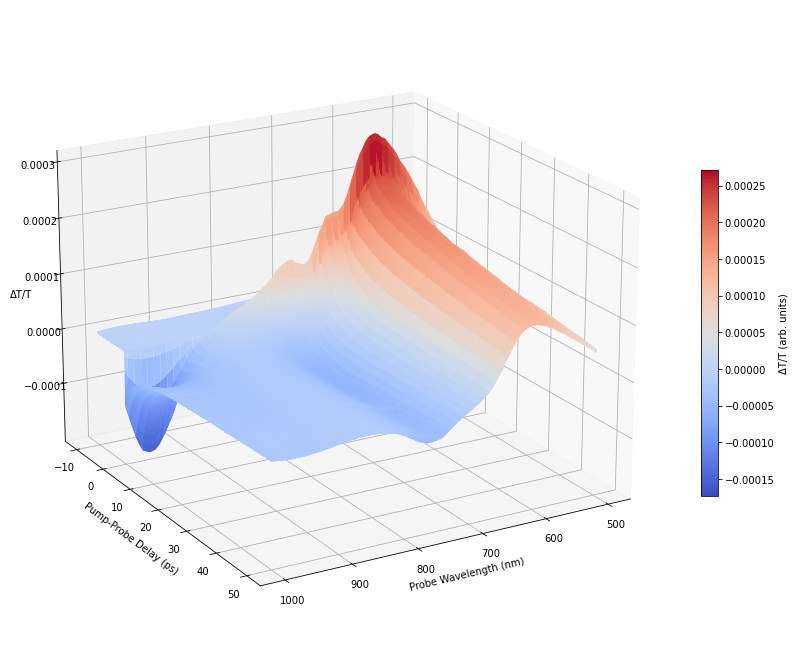

<Figure size 432x288 with 0 Axes>

In [33]:
TA_corrected = np.transpose(U) @ np.diag(SIG) @ EPS

# Assuming 'time_delays' and 'probe_wavelengths' are your 1D arrays for delays and wavelengths
# and 'dT_over_T' is your 2D array of ΔT/T values corresponding to these.

y= times # ALT: times[nonzero_index[0]]
x= wavelengths_TA
x_grid, y_grid = np.meshgrid(x, y)  # Create a mesh grid for X, Y dimensions

z_values = TA_corrected # ΔT/T values from transient absorption data

fig = plt.figure(figsize=[15, 12])
ax = fig.add_subplot(111, projection='3d')
# ax.set_zlim(-0.05, 0.01)  # Adjust the Z axis limits based on your data range
ax.view_init(20, 60)  # Adjust the viewing angle for better perspective

# Create a surface plot
p = ax.plot_surface(x_grid, y_grid, z_values, rstride=2, cstride=2, linewidth=0.1, cmap=cm.coolwarm)
cb = fig.colorbar(p, shrink=0.5)
cb.set_label('ΔT/T (arb. units)')

ax.set_xlabel('Probe Wavelength (nm)')
ax.set_ylabel('Pump-Probe Delay (ps)')
ax.set_zlabel('ΔT/T')

plt.show()

In [82]:
%matplotlib inline

@interact(t_index=(0,9999)) # 9999 or ALT: 8330

def interact_func(t_index = 50):
    plt.figure(figsize=(8,5))
    plt.title('Snapshot of Spectrum')
    plt.plot(wavelengths_TA, np.transpose(TA_corrected)[ : , t_index ],label='At time = {} ps'.format(round(times[t_index],2)))
    plt.plot([500,1000],[0,0],linestyle='--',color='orange')
    plt.xlim(500,1000)
    plt.grid(linestyle=':')
    plt.legend(loc='upper right')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Wavelength (nm)')
    plt.show()

interactive(children=(IntSlider(value=50, description='t_index', max=9999), Output()), _dom_classes=('widget-i…

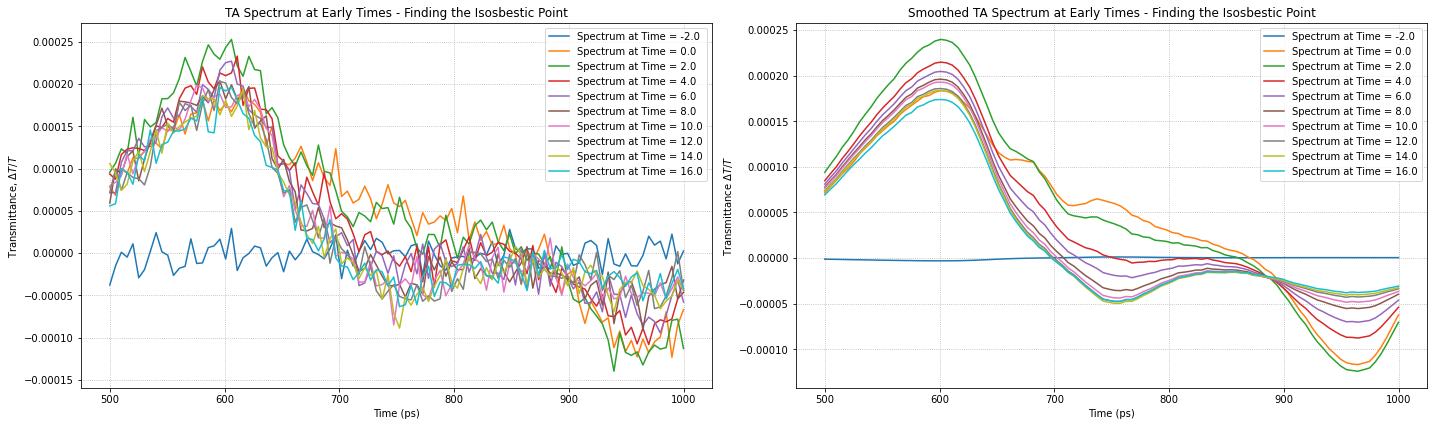

In [96]:
plt.figure(figsize=[20,6])

plt.subplot(1, 2, 1)

time_applied = 10
time_increment = 2

time_index = []
for i in range(time_applied):
    time_addition = 2 - time_increment*i
    time_index.append(np.argmin(np.abs(times + time_addition)))

plt.title('TA Spectrum at Early Times - Finding the Isosbestic Point')

for i,t in enumerate(time_index):
    plt.plot(wavelengths_TA, TA_matrix[:, t],label='Spectrum at Time = {}'.format(round(times[t],2)))

plt.legend(loc='best')
plt.grid(linestyle=':')
plt.ylabel('Transmittance, $\Delta T / T$')
plt.xlabel('Time (ps)')

plt.subplot(1, 2, 2)
time_applied = 10
time_increment = 2

time_index = []
for i in range(time_applied):
    time_addition = 2 - time_increment*i
    time_index.append(np.argmin(np.abs(times + time_addition)))

plt.title('Smoothed TA Spectrum at Early Times - Finding the Isosbestic Point')

for i,t in enumerate(time_index):
    plt.plot(wavelengths_TA, TA_corrected[t, :],label='Spectrum at Time = {}'.format(round(times[t],2)))

plt.legend(loc='best')
plt.grid(linestyle=':')
plt.ylabel('Transmittance $\Delta T / T$')
plt.xlabel('Time (ps)')

plt.tight_layout(pad=1)

plt.show()

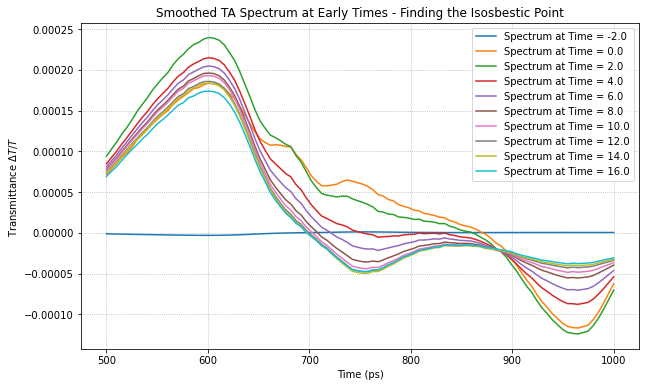

In [91]:
plt.figure(figsize=[10,6])
time_applied = 10
time_increment = 2

time_index = []
for i in range(time_applied):
    time_addition = 2 - time_increment*i
    time_index.append(np.argmin(np.abs(times + time_addition)))

plt.title('Smoothed TA Spectrum at Early Times - Finding the Isosbestic Point')

for i,t in enumerate(time_index):
    plt.plot(wavelengths_TA, TA_corrected[t, :],label='Spectrum at Time = {}'.format(round(times[t],2)))

plt.legend(loc='best')
plt.grid(linestyle=':')
plt.ylabel('Transmittance $\Delta T / T$')
plt.xlabel('Time (ps)')

plt.show()

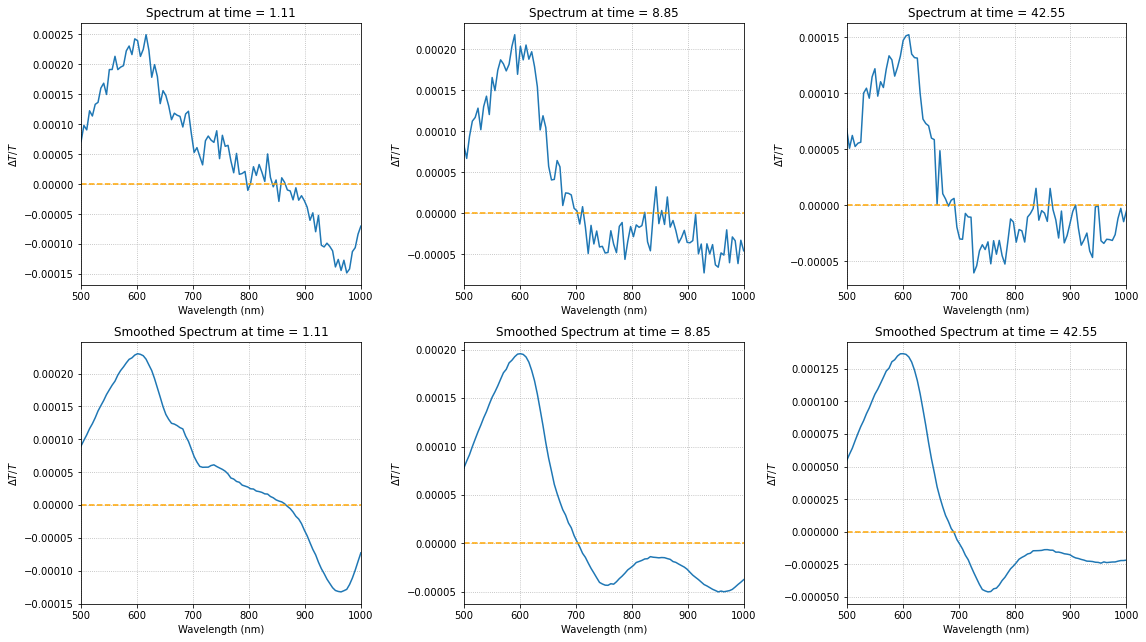

In [79]:
plt.figure(figsize=[16,9])

t_index = [1852, 3142, 8758]

for i,t in enumerate(t_index):
    plt.subplot(2, len(t_index), i+1)
    plt.title('Spectrum at time = {}'.format(round(times[t],2)))
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Wavelength (nm)')
    plt.plot(wavelengths_TA, TA_matrix[:, t])
    plt.plot([500,1000],[0,0],linestyle='--',color='orange')
    plt.xlim(500,1000)

for i,t in enumerate(t_index):
    plt.subplot(2, len(t_index), 3+ i+1)
    plt.title('Smoothed Spectrum at time = {}'.format(round(times[t],2)))
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Wavelength (nm)')
    plt.plot(wavelengths_TA, TA_corrected[t, :])
    plt.plot([500,1000],[0,0],linestyle='--',color='orange')
    plt.xlim(500,1000)

plt.tight_layout(pad=1)
plt.show()

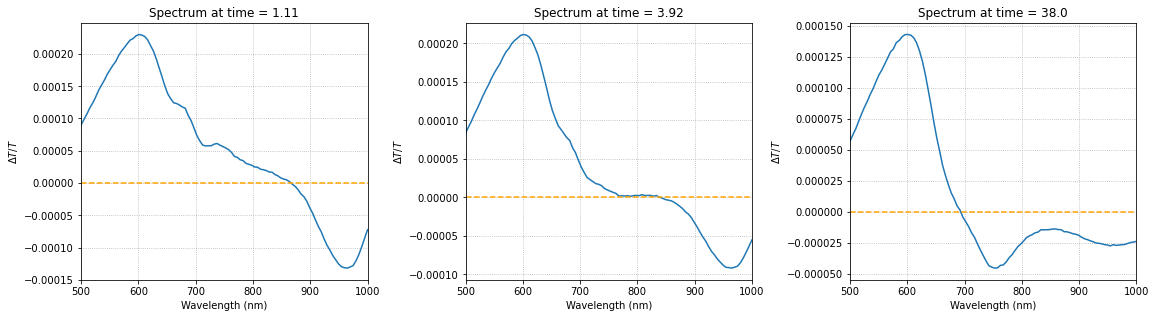

In [84]:
plt.figure(figsize=[16,8])

t_index = [1852, 2320, 8000]

for i,t in enumerate(t_index):
    plt.subplot(2, len(t_index), i+1)
    plt.title('Spectrum at time = {}'.format(round(times[t],2)))
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Wavelength (nm)')
    plt.plot(wavelengths_TA, TA_corrected[t, :])
    plt.plot([500,1000],[0,0],linestyle='--',color='orange')
    plt.xlim(500,1000)

plt.tight_layout(pad=0.5)
plt.show()

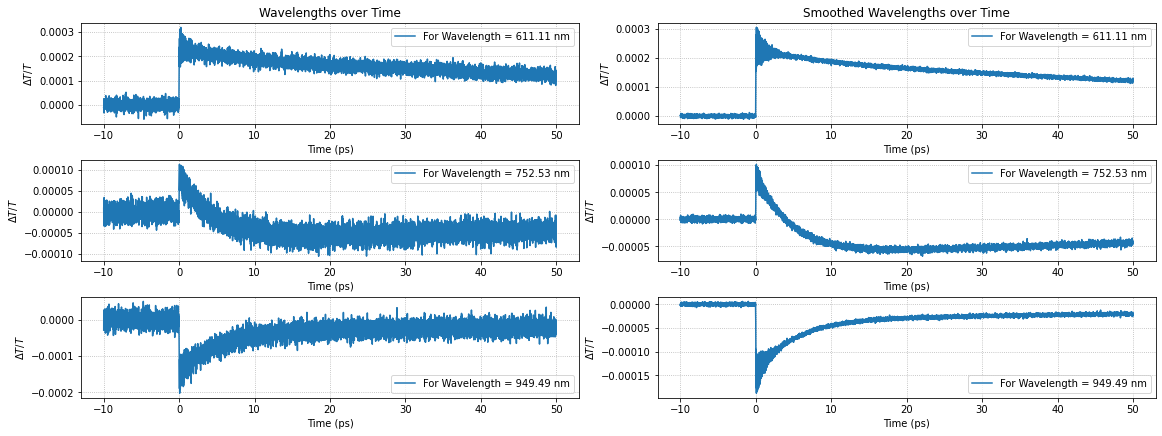

In [80]:
plt.figure(figsize=[16,6])
plt.title('Wavelength over Time')

w_index = [22, 50, 89]

for i,w in enumerate(w_index):
    plt.subplot(3, 2, 2*i+1)
    if i+1 == 1:
        plt.title('Wavelengths over Time')
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Time (ps)')
    plt.plot(times, TA_matrix[w, :],label='For Wavelength = {}'.format(round(wavelengths_TA[w],2))+' nm')
    plt.legend(loc='best')

for i,w in enumerate(w_index):
    plt.subplot(3, 2, 2*(i+1))
    if i+1 == 1:
        plt.title('Smoothed Wavelengths over Time')
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Time (ps)')
    plt.plot(times, TA_corrected[:, w],label='For Wavelength = {}'.format(round(wavelengths_TA[w],2))+' nm')
    plt.legend(loc='best')
    
plt.tight_layout(pad=0.5)
plt.show()

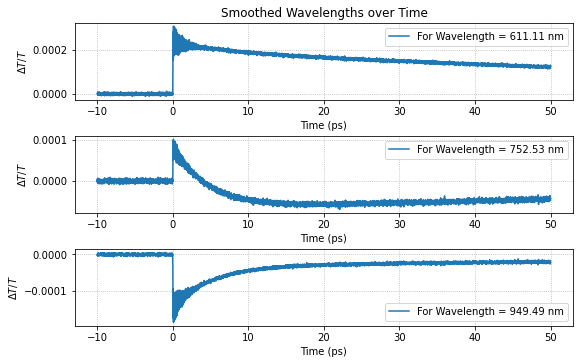

In [81]:
plt.figure(figsize=[8,5])
plt.title('Wavelength over Time')

w_index = [22, 50, 89]

for i,w in enumerate(w_index):
    plt.subplot(3, 1, i+1)
    if i+1 == 1:
        plt.title('Smoothed Wavelengths over Time')
    plt.grid(linestyle=':')
    plt.ylabel('$\Delta T / T$')
    plt.xlabel('Time (ps)')
    plt.plot(times, TA_corrected[:, w],label='For Wavelength = {}'.format(round(wavelengths_TA[w],2))+' nm')
    plt.legend(loc='best')
    
plt.tight_layout(pad=0.5)
plt.show()

### SPECTRA

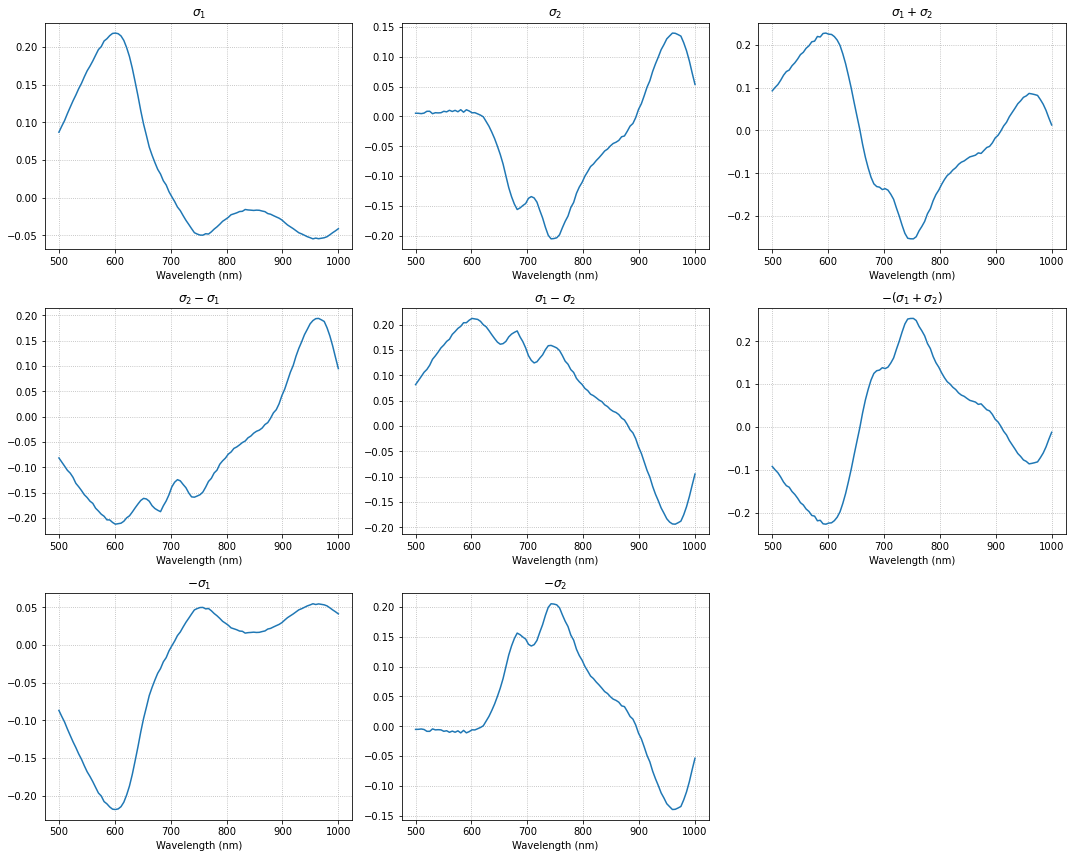

In [34]:
num_plots_y = 3
num_plots_x = 3

plt.figure(figsize=[num_plots_y*5,num_plots_x*4])

plt.subplot(num_plots_y, num_plots_x, 1)
plt.title('$\sigma_1$')
plt.plot(wavelengths_TA,EPS[0])
plt.grid(linestyle=':')
plt.xlabel('Wavelength (nm)')

plt.subplot(num_plots_y, num_plots_x, 2)
plt.title('$\sigma_2$')
plt.plot(wavelengths_TA,EPS[1])
plt.grid(linestyle=':')
plt.xlabel('Wavelength (nm)')

plt.subplot(num_plots_y, num_plots_x, 3)
plt.title('$\sigma_1 + \sigma_2$')
plt.plot(wavelengths_TA,EPS[0] + EPS[1])
plt.grid(linestyle=':')
plt.xlabel('Wavelength (nm)')

plt.subplot(num_plots_y, num_plots_x, 4)
plt.title('$\sigma_2 - \sigma_1$')
plt.plot(wavelengths_TA,EPS[1] - EPS[0])
plt.grid(linestyle=':')
plt.xlabel('Wavelength (nm)')

plt.subplot(num_plots_y, num_plots_x, 5)
plt.title('$\sigma_1 - \sigma_2$')
plt.plot(wavelengths_TA,EPS[0] - EPS[1])
plt.grid(linestyle=':')
plt.xlabel('Wavelength (nm)')

plt.subplot(num_plots_y, num_plots_x, 6)
plt.title('$-(\sigma_1 + \sigma_2$)')
plt.plot(wavelengths_TA,-1*EPS[0] - EPS[1])
plt.grid(linestyle=':')
plt.xlabel('Wavelength (nm)')

plt.subplot(num_plots_y, num_plots_x, 7)
plt.title('$ - \sigma_1$')
plt.plot(wavelengths_TA,-1*EPS[0])
plt.grid(linestyle=':')
plt.xlabel('Wavelength (nm)')

plt.subplot(num_plots_y, num_plots_x, 8)
plt.title('$ - \sigma_2$')
plt.plot(wavelengths_TA,-1*EPS[1])
plt.grid(linestyle=':')
plt.xlabel('Wavelength (nm)')

plt.tight_layout(pad=1)

### KINETICS

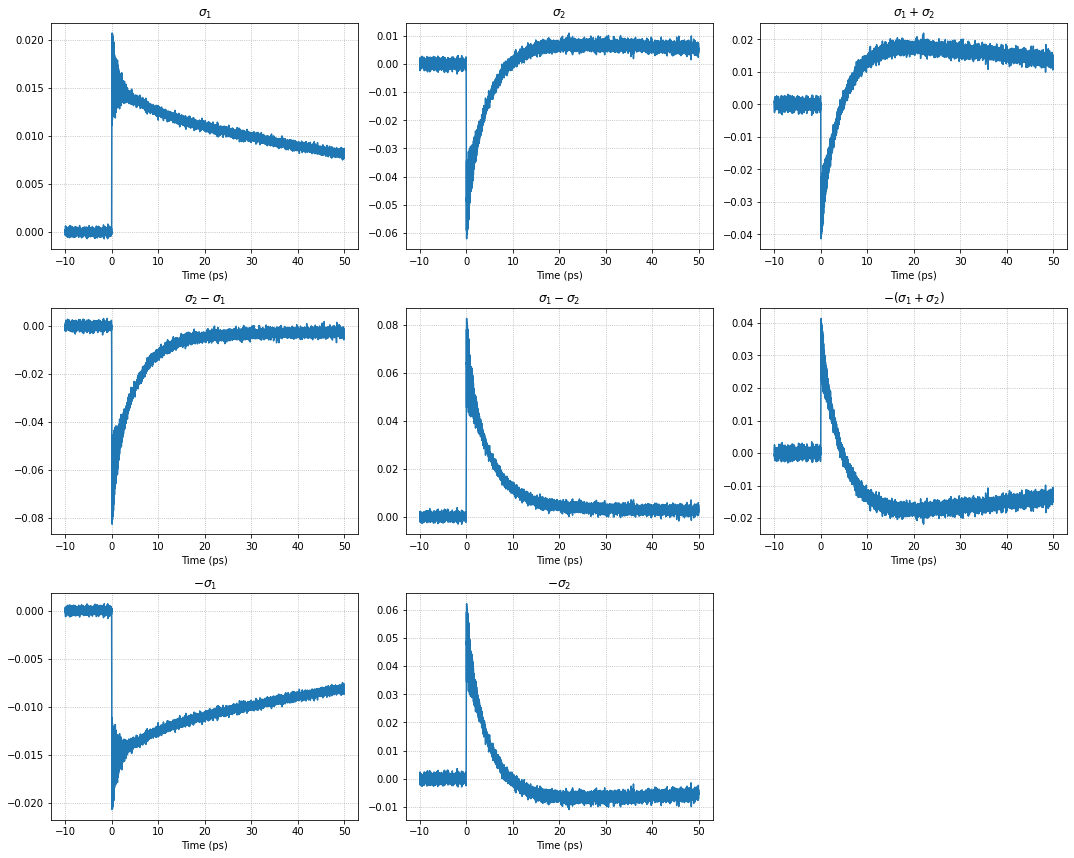

In [35]:
# times = times[nonzero_index[0]] # REMEBER TO REMOVE THIS

num_plots_y = 3
num_plots_x = 3

plt.figure(figsize=[num_plots_y*5,num_plots_x*4])

plt.subplot(num_plots_y, num_plots_x, 1)
plt.title('$\sigma_1$')
plt.plot(times,U[0])
plt.grid(linestyle=':')
plt.xlabel('Time (ps)')

plt.subplot(num_plots_y, num_plots_x, 2)
plt.title('$\sigma_2$')
plt.plot(times,U[1])
plt.grid(linestyle=':')
plt.xlabel('Time (ps)')

plt.subplot(num_plots_y, num_plots_x, 3)
plt.title('$\sigma_1 + \sigma_2$')
plt.plot(times,U[0] + U[1])
plt.grid(linestyle=':')
plt.xlabel('Time (ps)')

plt.subplot(num_plots_y, num_plots_x, 4)
plt.title('$\sigma_2 - \sigma_1$')
plt.plot(times,U[1] - U[0])
plt.grid(linestyle=':')
plt.xlabel('Time (ps)')

plt.subplot(num_plots_y, num_plots_x, 5)
plt.title('$\sigma_1 - \sigma_2$')
plt.plot(times,U[0] - U[1])
plt.grid(linestyle=':')
plt.xlabel('Time (ps)')

plt.subplot(num_plots_y, num_plots_x, 6)
plt.title('$-(\sigma_1 + \sigma_2$)')
plt.plot(times,-1*U[0] - U[1])
plt.grid(linestyle=':')
plt.xlabel('Time (ps)')

plt.subplot(num_plots_y, num_plots_x, 7)
plt.title('$ - \sigma_1$')
plt.plot(times,-1*U[0])
plt.grid(linestyle=':')
plt.xlabel('Time (ps)')

plt.subplot(num_plots_y, num_plots_x, 8)
plt.title('$ - \sigma_2$')
plt.plot(times,-1*U[1])
plt.grid(linestyle=':')
plt.xlabel('Time (ps)')

plt.tight_layout(pad=1)

#### Decay times (KINETICS) using SVD

##### GSB

In [38]:
def exp_func(t, tau, A, C):
    return A * np.e**( -1* t / tau ) + C

def get_decay(U_dat, guesses, title):
    # for timescale of \sigma_1, or other, fit data after t = 0 to exponential function, extract time constant

    # use curve_fit
    nonzero_index = [ times >= 0.01 ]
    tau_estimate = curve_fit(exp_func, times[ nonzero_index[0] ], U_dat[ nonzero_index[0] ], p0 = guesses)

    # show estimate & uncertainty
    #print('curve_fit', tau_estimate)

    # plot fitting
    t_range_for_fit = np.linspace( np.min(times [ nonzero_index[0] ]), np.max(times [ nonzero_index[0] ]) , 1000 )

    plt.figure(figsize = [10,6])
    plt.title('Time Dependance of Principle Component ' + title)
    plt.grid(linestyle=':')
    plt.xlabel('Time (ps)')
    plt.ylabel('Transmition Intensity, $\Delta T / T$')

    plt.plot(times, U_dat, label = 'principle component data')
    plt.plot( t_range_for_fit, exp_func( t_range_for_fit, tau_estimate[0][0], tau_estimate[0][1], tau_estimate[0][2]), label='fit to $A\;e^{t/\\tau} + C$ $,\\tau =$'+'{} ps'.format(round(tau_estimate[0][0],2)), linewidth=2.5)

    plt.legend(loc = 'best')

<ipython-input-38-4628424a4126>:2: RuntimeWarning: overflow encountered in power
  return A * np.e**( -1* t / tau ) + C


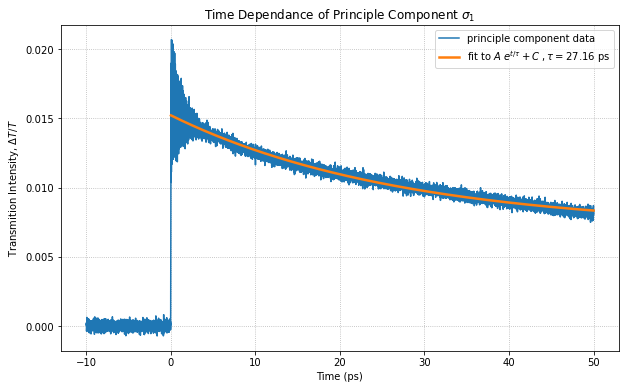

In [39]:
get_decay(U_dat = U[0], guesses = [0.02, 80, 0.02], title = '$\sigma_1$')

##### Decay time for PIA

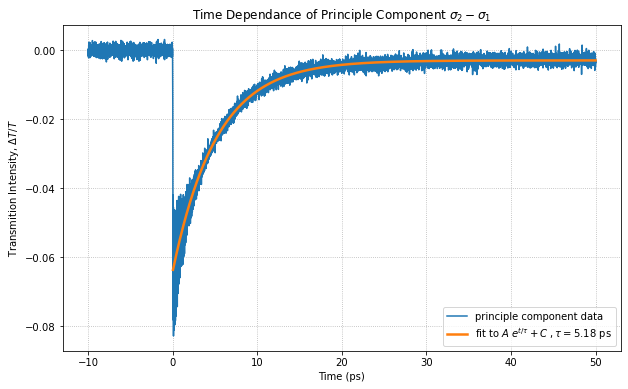

In [40]:
get_decay(U_dat = U[1] - U[0], guesses = [5, -0.08, 1], title = '$\sigma_2 - \sigma_1$')

#### PART 4: Vibrations

In [45]:
from numpy.fft import fft,ifft,fftshift,ifftshift,fftfreq

def exp_func(t, tau, A, C):
    return A * np.e**( -1* t / tau ) + C

def get_vibrations(U_dat, guesses, title):
    # for timescale of \sigma_1, or other, fit data after t = 0 to exponential function, extract time constant
    #U_dat = 
    #title = 
    #guesses = 

    # use curve_fit
    nonzero_index = [ times >= 0.01 ]
    tau_estimate = curve_fit(exp_func, times[ nonzero_index[0] ], U_dat[ nonzero_index[0] ], p0 = guesses)

    # show estimate & uncertainty
    #print('curve_fit', tau_estimate)

    # plot fitting
    t_range_for_fit = np.linspace( np.min(times [ nonzero_index[0] ]), np.max(times [ nonzero_index[0] ]) , len(U_dat[ nonzero_index[0] ]) )

    plt.figure(figsize = [10,8])
    plt.subplot(2, 1, 1)
    plt.title('Difference between TA Component and Exponential Fit (Beating Transmition Intensity)')
    plt.grid(linestyle=':')
    plt.xlabel('Time (ps)')
    plt.ylabel('Zeroed Transmition Intensity, $\Delta T / T$')

    zeroed_trans = U_dat[ nonzero_index[0] ] - exp_func( t_range_for_fit, tau_estimate[0][0], tau_estimate[0][1], tau_estimate[0][2])
    
    plt.plot( t_range_for_fit, zeroed_trans, label='compared to $A\;e^{t/\\tau} + C$ $,\\tau =$'+'{} ps'.format(round(tau_estimate[0][0],2)), linewidth=2.5)

    plt.legend(loc = 'best')
    
    dt = np.mean(np.diff(times[nonzero_index[0]]))
    vib_modes = ifftshift(ifft(zeroed_trans,norm="ortho"))
    freq_range = 2*np.pi*fftshift(fftfreq(len(times[nonzero_index[0]]),d=dt))
    
    plt.subplot(2, 1, 2)
    plt.title('Fourier Transform of Beating Transmition Intensity')
    plt.grid(linestyle=':')
    plt.xlabel('Frequency ($cm^{-1}$)')
    plt.ylabel('Weighting of Peaks')
    plt.plot(freq_range/(2*np.pi)*3.33565*10,abs(vib_modes))
    plt.xlim(500,1500)
    plt.ylim(0)
    
    plt.tight_layout(pad=1)

<ipython-input-45-5f98439faea0>:4: RuntimeWarning: overflow encountered in power
  return A * np.e**( -1* t / tau ) + C


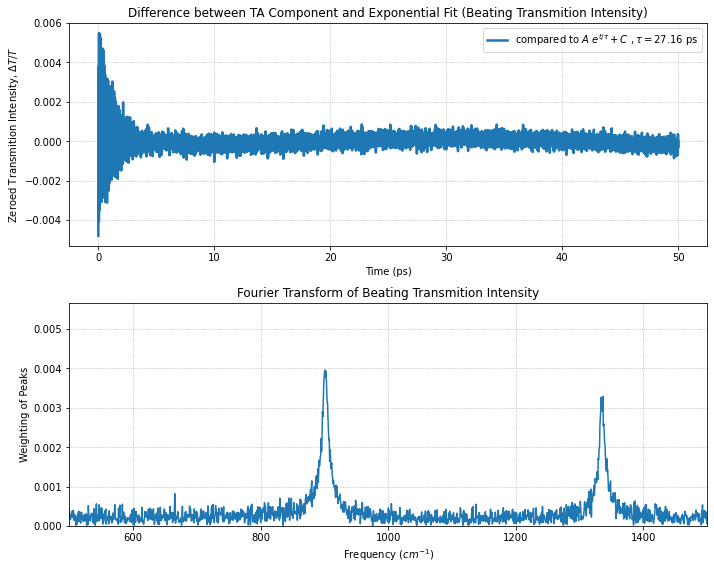

In [46]:
get_vibrations(U_dat = U[0], guesses = [0.02, 80, 0.02], title = '$\sigma_1$')

<ipython-input-45-5f98439faea0>:4: RuntimeWarning: overflow encountered in power
  return A * np.e**( -1* t / tau ) + C


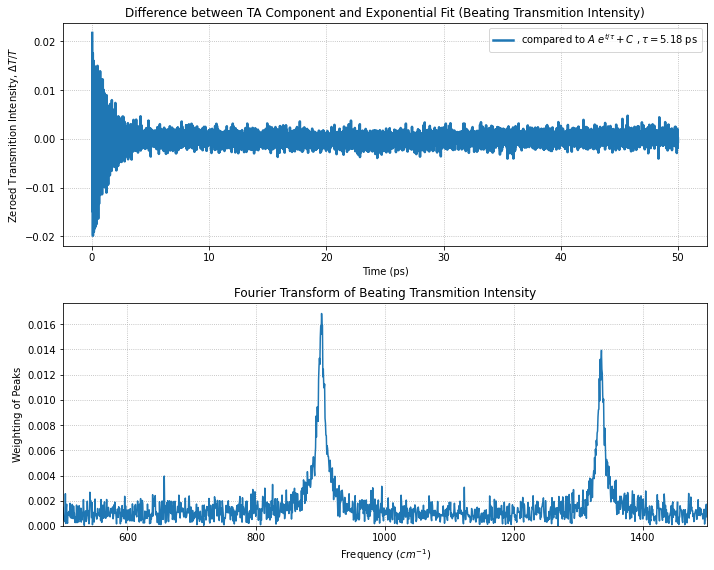

In [47]:
get_vibrations(U_dat = U[1] - U[0], guesses = [0.02, 80, 0.02], title = '$\sigma_2 - \sigma_1$')

#### Combined and Interactive!

In [48]:
@interact(U1_coeff=(-1,1,0.05),U2_coeff=(-1,1,0.05))

def interact_func(U1_coeff = -0.7, U2_coeff = 1):
    U_dat = U1_coeff*U[0] + U2_coeff*U[1]
    get_decay(U_dat, guesses = [5, -0.08, 1], title = 'Combination')
    get_vibrations(U_dat, guesses = [0.02, 80, 0.02], title = 'interacts')
    plt.show()

interactive(children=(FloatSlider(value=-0.7, description='U1_coeff', max=1.0, min=-1.0, step=0.05), FloatSlid…